# Earnings Based on College Major

For this project, I'll be demonstrating what I've learned about using the **`Matplotlib`** library to plot basic data visualizations. The following skills will be used to complete this project:
* Creation of lineplots, scatterplots, bar charts, histograms, and boxplots
* Customization of aesthetics and parameters of plots
* Creation of multi-plot figures and single figures with multiple plots
* Interpretation of data using visual information generated by plotting

The data I will be using for this project was gathered and aggregated by American Community Survey and cleaned by Five Thirty-Eight. You may find the dataset [here](https://github.com/fivethirtyeight/data/tree/master/college-majors). This data will be used to answer a variety of questions about college major choices and impact on future earnings, such as:
* do students with more popular majors earn more money?
* how many majors are predominantly male vs. female?
* which kind of majors have the most students?
* which majors make the most money?

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#imports pandas, matplotlib, and numpy
%matplotlib inline
#magic to display plots inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
#reads in .csv as a dataframe
recent_grads.iloc[0]
# displays first row of recent_grads dataframe

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head(10)
#displays first 10 rows of recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [5]:
recent_grads.info()
#displays info on columns and value types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [14]:
recent_grads.describe(include='all')
#gives descriptive stats for all columns

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,MATHEMATICS AND COMPUTER SCIENCE,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [15]:
recent_grads = recent_grads.dropna()
#drops the one row with missing data

In [140]:
def scatterplotter(dataframe, x_axis_series, y_axis_series, x_label, y_label, dot_label):
    scatterplot = dataframe.plot(x=x_axis_series, y=y_axis_series, kind='scatter', label=dot_label, figsize=(7,5))
    scatterplot.set_xlabel(x_label)
    scatterplot.set_ylabel(y_label)
    plt.legend()
#creates a scatterplot of two series in a dataframe
    m, b = np.polyfit(dataframe[x_axis_series], dataframe[y_axis_series], 1)
    scatterplot.plot(dataframe[x_axis_series], m*dataframe[x_axis_series] + b, c='red')
#plots the line of best fit
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#removes the upper and right spines

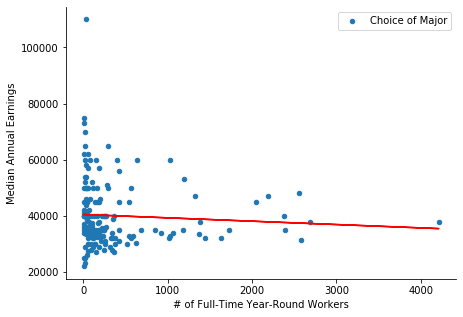

In [141]:
scatterplotter(recent_grads, 'Sample_size', 'Median', '# of Full-Time Year-Round Workers', 'Median Annual Earnings', 'Choice of Major')
#creates a scatterplot of [Sample_size] vs. [Median]

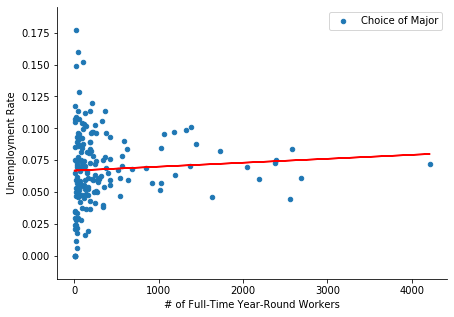

In [142]:
scatterplotter(recent_grads, 'Sample_size', 'Unemployment_rate', '# of Full-Time Year-Round Workers', 'Unemployment Rate', 'Choice of Major')
#creates a scatterplot of [Sample_size] vs. [Unemployment_rate]

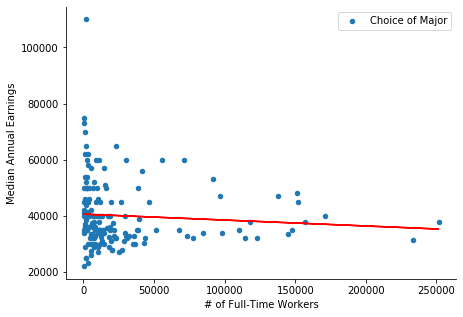

In [144]:
scatterplotter(recent_grads, 'Full_time', 'Median', '# of Full-Time Workers', 'Median Annual Earnings', 'Choice of Major')
#creates a scatterplot of [Sample_size] vs. [Full_time]

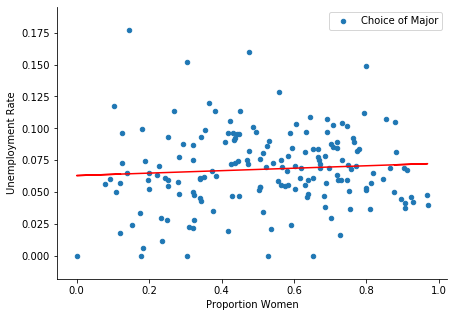

In [145]:
scatterplotter(recent_grads, 'ShareWomen', 'Unemployment_rate', 'Proportion Women', 'Unemployment Rate', 'Choice of Major')
#creates a scatterplot of [ShareWomen] vs. [Unemployment_rate]

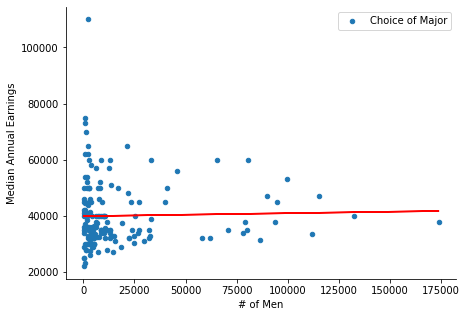

In [146]:
scatterplotter(recent_grads, 'Men', 'Median', '# of Men', 'Median Annual Earnings', 'Choice of Major')
#creates a scatterplot of [Men] vs. [Median]

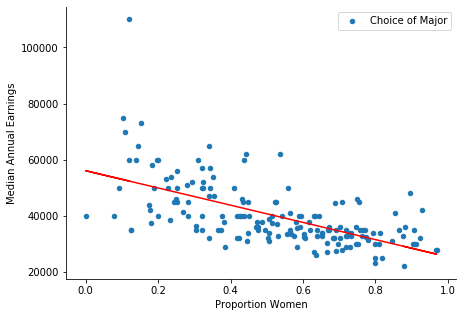

In [147]:
scatterplotter(recent_grads, 'ShareWomen', 'Median', 'Proportion Women', 'Median Annual Earnings', 'Choice of Major')
#creates a scatterplot of [ShareWomen] vs. [Median]

While many of our lines of best fit don't have noticeable slopes, our last plot shows a conspicuous decline in annual earnings as a function of proportion of majors that are women. Statistical analyses would need to be performed to confirm significance, which is beyond the scope of this current project.<br> <br>Also notable is the shape of our scatter when our x-axis is a count: lots of clustering at the lower end of the count. This implies that many majors have only a few data points to explore.<br> <br>If we take # of year-round, full-time workers as a measure of the popularity of a major, then we also find that the more popular a major is, the more likely it is to have lower annual earnings and a higher unemployment rate. This could be a function of job market saturation.  

In [186]:
def histogrammer (dataframe, series, chart_title):
    histogram = dataframe.hist(series, bins=20)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(chart_title)
    ax.grid(False)

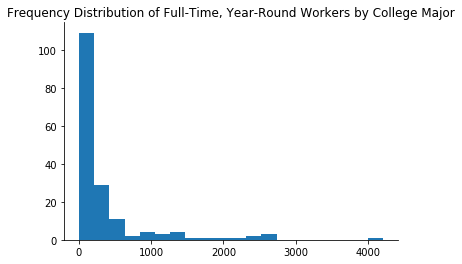

In [193]:
histogrammer(recent_grads, 'Sample_size', 'Frequency Distribution of Full-Time, Year-Round Workers by College Major')

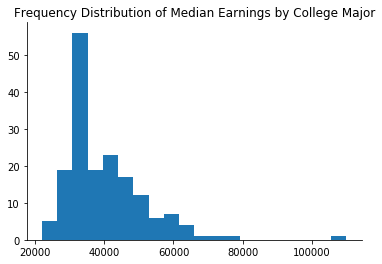

In [194]:
histogrammer(recent_grads, 'Median', 'Frequency Distribution of Median Earnings by College Major')

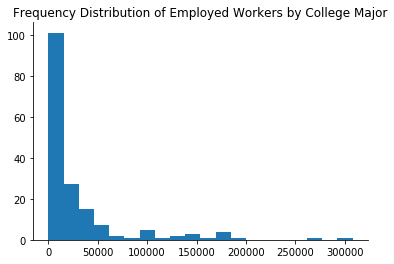

In [195]:
histogrammer(recent_grads, 'Employed', 'Frequency Distribution of Employed Workers by College Major')

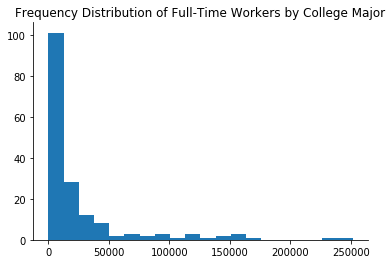

In [196]:
histogrammer(recent_grads, 'Full_time', 'Frequency Distribution of Full-Time Workers by College Major')

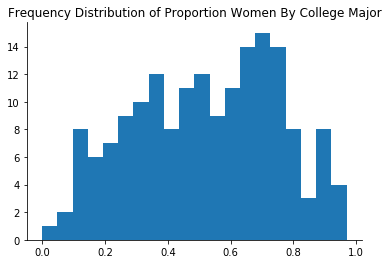

In [197]:
histogrammer(recent_grads, 'ShareWomen', 'Frequency Distribution of Proportion Women By College Major')

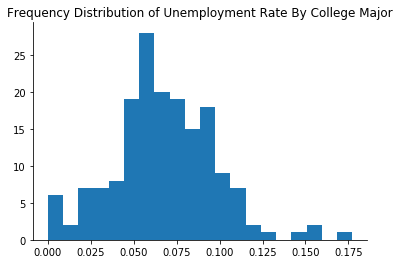

In [198]:
histogrammer(recent_grads, 'Unemployment_rate', 'Frequency Distribution of Unemployment Rate By College Major')

In [ ]:
histogrammer(recent_grads,)